In [1]:
import numpy as np
from utilities import visualize_result, show, get_test_data
import matplotlib.pyplot as plt
from HopfieldNetwork import HopfieldNetwork, LearningRule, Mode
from data_manager import *
import matplotlib.image as mpimg
from PIL import Image

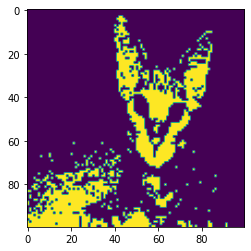

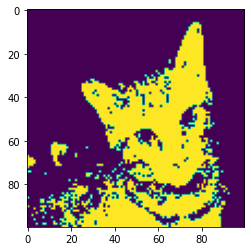

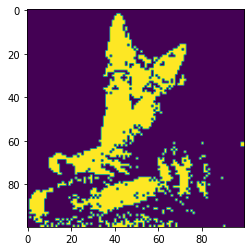

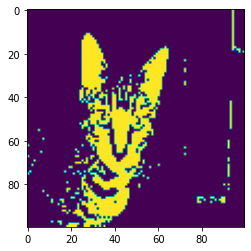

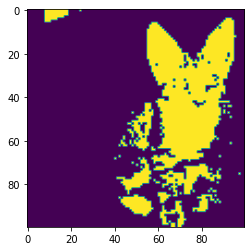

In [2]:
from os import walk
cats_dir = "hopfield_cats"
filenames = next(walk(cats_dir), (None, None, []))[2] 


h = 100
w = 100
size = (h, w)
m = 5
n = h*w
data = np.zeros((n, m))
idx = 0

sample_count_m = m
neurons_count_n = n
height = h
width = w

for cat_file in filenames[:m]:
    file = cats_dir + "/" + cat_file
    plt.figure()
    col = Image.open(file)
    gray = col.convert('L')
    bw = gray.point(lambda x: -1 if x < 128 else 1, '1')
    bw = bw.resize(size)
    arr = np.asarray(bw)
    arr = np.where(arr == 0, -1, 1)
    data[:, idx] = arr.reshape(n)
    idx += 1
    plt.imshow(arr)

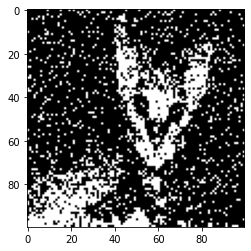

In [4]:
random_seed = 123
random_generator = np.random.default_rng(seed=random_seed)
noise_percentage = 0.1
noise_changes_count = int(noise_percentage * neurons_count_n)
sample_test = get_test_data(np.copy(data[:, 0]), noise_changes_count, random_generator)
plt.imshow(sample_test.reshape(h, w), cmap='gray')

In [12]:
def plot_results(images, noised_images, results_hebb, results_oja, m, height, width, fig_height, fig_width, cmap_type='gray'):
    fig, axes = plt.subplots(m, 4, figsize=(fig_width, fig_height)) 
    fig.patch.set_facecolor('white')
    fig.tight_layout()

    for i in range(0, m):
        
        axes[i, 0].imshow(images[i].reshape(height, width), cmap=cmap_type)
        axes[i, 1].imshow(noised_images[i].reshape(height, width), cmap=cmap_type)
        axes[i, 2].imshow(results_hebb[i].reshape(height, width), cmap=cmap_type)
        axes[i, 3].imshow(results_oja[i].reshape(height, width), cmap=cmap_type)
        
        for ax_i in axes:
            for ax_j in ax_i:
                ax_j.set_xticks([])
                ax_j.set_yticks([])
                ax_j.patch.set_edgecolor('black') 
                ax_j.patch.set_linewidth('1')

In [6]:
random_seed = 123

def get_weights(data, sample_count_m, neurons_count_n):
    
    network = HopfieldNetwork(LearningRule.Hebb, Mode.Synchronous, data, sample_count_m, neurons_count_n, random_seed)
    T_Hebb = network.get_weights()
    print("Hebb done")

    network.set_learning_rule(LearningRule.Oja)
    T_Oja = network.get_weights(0.001, 100)
    print("Oja done")
    return T_Hebb, T_Oja, network


def get_images(data, sample_count_m, neurons_count_n, p, T_Hebb, T_Oja, network):

    random_generator = np.random.default_rng(seed=random_seed)
    noise_percentage = p
    noise_changes_count = int(noise_percentage * neurons_count_n)
    
    images = []
    noised_images = []
    results_hebb = []
    results_oja = []

    for i in range(0, sample_count_m):
        sample_id = i

        sample = np.reshape(data[:, sample_id], (neurons_count_n, 1))
        images.append(sample)

        sample_test = get_test_data(np.copy(sample), noise_changes_count, random_generator)
        noised_images.append(sample_test)

        result_synchronous_hebb = network.recognize(T_Hebb, np.copy(sample_test), 1000)
        results_hebb.append(result_synchronous_hebb)

        result_synchronous_oja = network.recognize(T_Oja, np.copy(sample_test), 1000)
        results_oja.append(result_synchronous_oja)
    
    return images, noised_images, results_hebb, results_oja, sample_count_m

In [7]:
T_Hebb, T_Oja, network = get_weights(data, sample_count_m, neurons_count_n)

Hebb done


D:\Studia\Magisterka\mgr_sem2\sieci_neuronowe\projekt2\hopfieldNetwork\HopfieldNetwork\HopfieldNetwork\HopfieldNetwork.py:60: RuntimeWarning: overflow encountered in matmul
  t += nu * np.outer(y, (x - np.matmul(y, t)))


Oja done


In [10]:
noise_p = 0.1
images, noised_images, results_hebb, results_oja, sample_count_m  = get_images(data, sample_count_m, neurons_count_n, noise_p, T_Hebb, T_Oja, network)

Model convergence at 5 iter
Iter exceeded
Model convergence at 4 iter
Iter exceeded
Model convergence at 5 iter
Iter exceeded
Model convergence at 5 iter
Iter exceeded
Model convergence at 4 iter
Iter exceeded


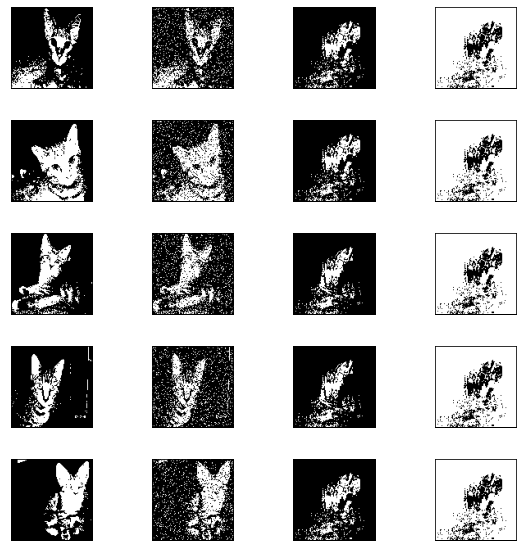

In [13]:
plot_results(images, noised_images, results_hebb, results_oja, sample_count_m, height, width, 8, 8)